In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

from keplergl import KeplerGl

#Functions
from src.funk import Funk 

In [6]:
#I will deal only with Comunidad de Madrid to save resources. 
# If needed, the whole set or another subset can be used, the polygons are there. 

#spain=gpd.read_file('polygons/georef-spain-municipio@public.geojson')   # cargar datos geoespaciales (multipolygon)
#RangeIndex: 8223 entries, 0 to 8222 ; Data columns (total 12 columns) ; memory usage: 6.8 MB

#madri = spain[spain['prov_name'] == 'Madrid']
# Int64Index: 181 entries, 176 to 8027 ; Data columns (total 12 columns) ; memory usage: 151.5 KB

#Only Comunidad de Madrid saved.
#madri.to_file('polygons/Comunidad_de_Madrid.geojson', driver='GeoJSON')

In [9]:
#This file contains the polygons for Comunidad de Madrid, for each Municipio.
#This file does not have municipal codes, only zipcodes. Also, the name of the Municipios does not exactly match the base table.

#I can see two possible paths. 
# Either assign zipcodes to every municipio on the base table, but some municipios have several zipcodes. 
#  Only Alaclá de Henares has 7 different zipcodes
#   mun_code is not zipcode, it is its code in the Agencia Tributaria
#    Mun_id in foreign_born is the code for Institudo de Estadística
#     Most likely one is the code for Comunidad de Madrid and the other one is in Spain
# Or clean their names in order to match the base table.
#  This will be the way.

madrid = gpd.read_file('polygons/Comunidad_de_Madrid.geojson')   # cargar datos geoespaciales (multipolygon)
#RangeIndex: 181 entries, 0 to 180 ; Data columns (total 12 columns): memory usage: 17.1+ KB

madrid.head()

,geo_point_2d,year,acom_code,acom_name,prov_code,prov_name,mun_code,mun_name,mun_area_code,mun_type,mun_name_local,geometry
0,"{'lon': -3.4801385596854346, 'lat': 40.5239757...",2022,13,Comunidad de Madrid,28,Madrid,28002,Ajalvir,ESP,municipality,NaN,"POLYGON ((-3.51222 40.53864, -3.51151 40.53759..."
1,"{'lon': -3.3696004109155107, 'lat': 40.4945916...",2022,13,Comunidad de Madrid,28,Madrid,28005,Alcalá de Henares,ESP,municipality,NaN,"POLYGON ((-3.44720 40.44631, -3.44669 40.44589..."
2,"{'lon': -3.766947850822002, 'lat': 40.23065887...",2022,13,Comunidad de Madrid,28,Madrid,28106,Parla,ESP,municipality,NaN,"POLYGON ((-3.80761 40.22942, -3.80746 40.22884..."
3,"{'lon': -3.561632832160786, 'lat': 40.24313069...",2022,13,Comunidad de Madrid,28,Madrid,28132,San Martín de la Vega,ESP,municipality,NaN,"POLYGON ((-3.64364 40.22966, -3.64368 40.22933..."
4,"{'lon': -3.2234223881113153, 'lat': 40.4714399...",2022,13,Comunidad de Madrid,28,Madrid,28136,Santorcaz,ESP,municipality,NaN,"POLYGON ((-3.25833 40.48396, -3.25850 40.48279..."


In [16]:
#, inplace=True
madrid.drop(madrid.columns[[1, 2, 3, 4, 5, 8, 9, 10]], axis=1, inplace=True)
madrid.head()

,geo_point_2d,year,acom_name,prov_code,prov_name,mun_code,mun_name,mun_area_code,mun_type,mun_name_local,geometry
0,"{'lon': -3.4801385596854346, 'lat': 40.5239757...",2022,Comunidad de Madrid,28,Madrid,28002,Ajalvir,ESP,municipality,NaN,"POLYGON ((-3.51222 40.53864, -3.51151 40.53759..."
1,"{'lon': -3.3696004109155107, 'lat': 40.4945916...",2022,Comunidad de Madrid,28,Madrid,28005,Alcalá de Henares,ESP,municipality,NaN,"POLYGON ((-3.44720 40.44631, -3.44669 40.44589..."
2,"{'lon': -3.766947850822002, 'lat': 40.23065887...",2022,Comunidad de Madrid,28,Madrid,28106,Parla,ESP,municipality,NaN,"POLYGON ((-3.80761 40.22942, -3.80746 40.22884..."
3,"{'lon': -3.561632832160786, 'lat': 40.24313069...",2022,Comunidad de Madrid,28,Madrid,28132,San Martín de la Vega,ESP,municipality,NaN,"POLYGON ((-3.64364 40.22966, -3.64368 40.22933..."
4,"{'lon': -3.2234223881113153, 'lat': 40.4714399...",2022,Comunidad de Madrid,28,Madrid,28136,Santorcaz,ESP,municipality,NaN,"POLYGON ((-3.25833 40.48396, -3.25850 40.48279..."


In [17]:
mapa_k = KeplerGl(height=600, width=800)   # inicia el mapa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [18]:
mapa_k.add_data(madrid.copy(), 'Madrí')    # se añaden datos y se pone nombre

In [19]:
mapa_k

KeplerGl(data={'Madrí': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2…

In [8]:
f_b = pd.read_csv('clean_data/Foreign_born.csv')
#Columns: 212 entries, Mun_id to _merge ; dtypes: float64(1), int64(209), object(2) ; memory usage: 298.2+ KB
#There are only 179 minucipios in Comunidad de Madrid, what are the other 33 entries?
f_b.head()

,Mun_id,Municipio,Poblacion_total,Porcentaje_pob_ext,Nacimiento_extranjero,Unión Europea,Resto de Europa,África,América del Norte,América Central y del Caribe,América del Sur,Otros países de América_x,Asia,Oceanía,Albania,Austria,Belgica,Bulgaria,Chipre,Dinamarca,España,Finlandia,Francia,Grecia,Hungría,Irlanda,Islandia,Italia,Liechtenstein,Luxemburgo,Malta,Mónaco,Noruega,Países Bajos,Polonia,Portugal,Andorra,Reino Unido,Alemania,Rumanía,San Marino,Santa Sede,Suecia,Suiza,Ucrania,Letonia,Moldavia,Belarús,Georgia,Estonia,Lituania,República Checa,Eslovaquia,Bosnia y Herzegovina,Croacia,Eslovenia,Armenia,Rusia,Macedonia,Serbia,Montenegro,Otros países de Europa,Burkina Faso,Angola,Argelia,Benin,Botswana,Burundi,Cabo Verde,Camerún,Comoras,Congo,Costa de Marfil,Djibouti,Egipto,Etiopía,Gabón,Gambia,Ghana,Guinea,Guinea Bissau,Guinea Ecuatorial,Kenia,Lesotho,Liberia,Libia,Madagascar,Malawi,Mali,Marruecos,Mauricio,Mauritania,Mozambique,Namibia,Níger,Nigeria,República Centroafricana,Sudáfrica,Rwanda,Santo Tomé y Príncipe,Senegal,Seychelles,Sierra Leona,Somalia,Sudán,Swazilandia,Tanzania,Chad,Togo,Túnez,Uganda,República Democrática del Congo,Zambia,Zimbabwe,Eritrea,Sudán del Sur,Otros países de África,Canadá,Estados Unidos de América,México,Antigua y Barbuda,Bahamas,Barbados,Belice,Costa Rica,Cuba,Dominica,El Salvador,Granada,Guatemala,Haití,Honduras,Jamaica,Nicaragua,Panamá,San Vicente y Las Granadinas,República Dominicana,Trinidad Y Tobago,Santa Lucía,San Cristobal y Nieves,Argentina,Bolivia,Brasil,Colombia,Chile,Ecuador,Guyana,Paraguay,Perú,Surinám,Uruguay,Venezuela,Otros países de América_y,Afganistán,Arabia Saudita,Bahrein,Bangladesh,Myanmar,China,Emiratos Árabes Unidos,Filipinas,India,Indonesia,Iraq,Irán,Israel,Japón,Jordania,Camboya,Kuwait,Laos,Líbano,Malasia,Maldivas,Mongolia,Nepal,Omán,Pakistán,Qatar,Corea del Sur,Corea del Norte,Singapur,Siria,Sri Lanka,Tailandia,Turquía,Vietnam,Brunei,Islas Marshall,Yemen,Azerbaiyán,Kazajstán,Kirguistán,Tayikistán,Turkmenistán,Uzbekistán,Bhutan,Otros países de Asia,Australia,Fiji,Nueva Zelanda,Papua Nueva Guinea,Islas Salomón,Samoa,Tonga,Vanuatu,Micronesia,Tuvalu,Timor Oriental,Apátridas,Otros países de Oceanía,_merge
0,14,Acebeda (La),55,3.636364,2,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both
1,29,Ajalvir,4676,18.028229,843,4103,40,89,39,126,257,0,21,1,0,0,0,5,0,2,263,0,4,0,0,1,0,24,0,0,0,0,0,4,6,5,0,15,10,188,0,0,4,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,0,0,0,0,0,58,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,21,5,0,0,0,0,0,49,1,7,0,0,0,0,0,4,0,0,7,0,0,0,7,5,13,24,6,7,0,3,14,0,1,40,0,0,0,0,0,0,11,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,both
2,35,Alameda del Valle,246,14.227642,35,213,1,0,2,0,30,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,6,0,0,0,0,2,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both
3,40,Alamo (El),9908,19.206701,1903,8366,73,561,22,214,628,0,43,1,3,1,0,9,1,0,612,0,6,1,1,0,0,27,0,0,0,0,0,0,21,15,0,8,1,240,0,0,0,0,30,0,13,0,0,0,0,1,0,0,0,0,2,2,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,2,411,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,0,0,0,0,1,49,0,2,0,0,0,53,0,7,0,0,23,0,0,0,13,10,23,131,11,23,0,15,26,0,7,48,0,0,0,0,0,0,18,0,2,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,7,0,0,0,

In [5]:
'''naci_fue.drop([8,9], axis=0, inplace=True) #Countries row out
naci_fue.reset_index(drop=True, inplace=True) #Reset index

naci_fue.fillna(0, inplace=True) #Nan to 0 people`'''

'N nan cols: 1'

mun_name_local    100.0
dtype: float64

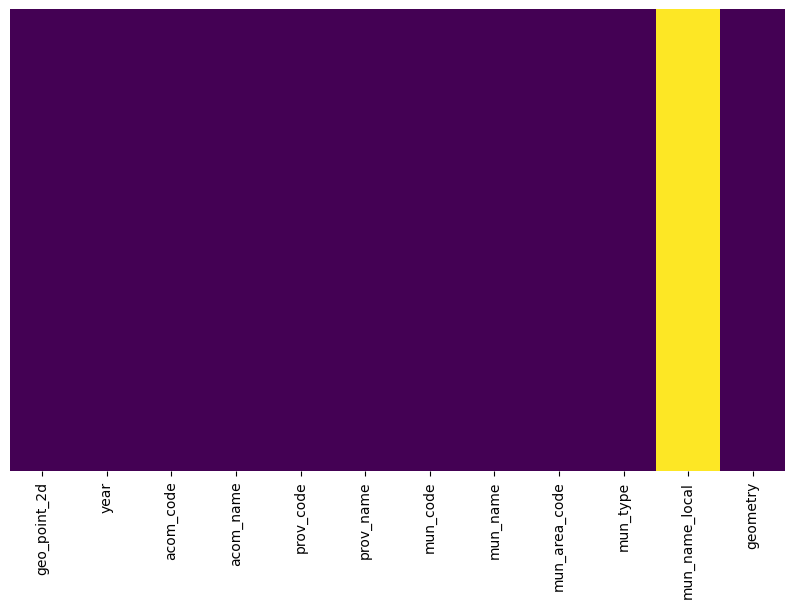

In [10]:

Funk.check_nan(madrid)

In [8]:
#Cleaning excel table into dataframe
'''
pob_total.drop([0,1,2,3,4,5,6,7], axis=0, inplace=True) #Excel headers out
pob_total = pob_total.rename(columns=pob_total.iloc[0]) #Assign column headers
pob_total.columns.values[0] = 'Mun_id'
pob_total.columns.values[1] = 'Municipio'
pob_total.columns.values[2] = 'Poblacion_total'
pob_total.drop([8,9], axis=0, inplace=True) #Countries row out
pob_total.reset_index(drop=True, inplace=True) #Reset index

pob_total.fillna(0, inplace=True) #Nan to 0 people

pob_total.head()'''

,Mun_id,Municipio,Poblacion_total,Unión Europea,Resto de Europa,África,América del Norte,América Central y del Caribe,América del Sur,Otros países de América,Asia,Oceanía
0,0014,Acebeda (La),55,54,0,0,0,0,1,0,0,0
1,0029,Ajalvir,4676,4103,40,89,39,126,257,0,21,1
2,0035,Alameda del Valle,246,213,1,0,2,0,30,0,0,0
3,0040,Alamo (El),9908,8366,73,561,22,214,628,0,43,1
4,0053,Alcalá de Henares,195982,172830,2351,3972,586,2989,11174,0,2053,27


In [9]:
#Merging both dataframes

'''naci_fue.drop(['Municipio'], axis=1, inplace=True)
tab_base = pob_total.merge(naci_fue, on='Mun_id', how='left', indicator=True)
col = tab_base.pop('Nacimiento_extranjero')
tab_base.insert(3, col.name, col)'''

In [10]:
#Calculating foreign-born percentage 

'''tab_base['Porcentaje_pob_ext'] = (tab_base['Nacimiento_extranjero'] / tab_base['Poblacion_total']) * 100
col = tab_base.pop('Porcentaje_pob_ext')
tab_base.insert(3, col.name, col)
tab_base.head()'''

,Mun_id,Municipio,Poblacion_total,Porcentaje_pob_ext,Nacimiento_extranjero,Unión Europea,Resto de Europa,África,América del Norte,América Central y del Caribe,América del Sur,Otros países de América_x,Asia,Oceanía,Albania,Austria,Belgica,Bulgaria,Chipre,Dinamarca,España,Finlandia,Francia,Grecia,Hungría,Irlanda,Islandia,Italia,Liechtenstein,Luxemburgo,Malta,Mónaco,Noruega,Países Bajos,Polonia,Portugal,Andorra,Reino Unido,Alemania,Rumanía,San Marino,Santa Sede,Suecia,Suiza,Ucrania,Letonia,Moldavia,Belarús,Georgia,Estonia,Lituania,República Checa,Eslovaquia,Bosnia y Herzegovina,Croacia,Eslovenia,Armenia,Rusia,Macedonia,Serbia,Montenegro,Otros países de Europa,Burkina Faso,Angola,Argelia,Benin,Botswana,Burundi,Cabo Verde,Camerún,Comoras,Congo,Costa de Marfil,Djibouti,Egipto,Etiopía,Gabón,Gambia,Ghana,Guinea,Guinea Bissau,Guinea Ecuatorial,Kenia,Lesotho,Liberia,Libia,Madagascar,Malawi,Mali,Marruecos,Mauricio,Mauritania,Mozambique,Namibia,Níger,Nigeria,República Centroafricana,Sudáfrica,Rwanda,Santo Tomé y Príncipe,Senegal,Seychelles,Sierra Leona,Somalia,Sudán,Swazilandia,Tanzania,Chad,Togo,Túnez,Uganda,República Democrática del Congo,Zambia,Zimbabwe,Eritrea,Sudán del Sur,Otros países de África,Canadá,Estados Unidos de América,México,Antigua y Barbuda,Bahamas,Barbados,Belice,Costa Rica,Cuba,Dominica,El Salvador,Granada,Guatemala,Haití,Honduras,Jamaica,Nicaragua,Panamá,San Vicente y Las Granadinas,República Dominicana,Trinidad Y Tobago,Santa Lucía,San Cristobal y Nieves,Argentina,Bolivia,Brasil,Colombia,Chile,Ecuador,Guyana,Paraguay,Perú,Surinám,Uruguay,Venezuela,Otros países de América_y,Afganistán,Arabia Saudita,Bahrein,Bangladesh,Myanmar,China,Emiratos Árabes Unidos,Filipinas,India,Indonesia,Iraq,Irán,Israel,Japón,Jordania,Camboya,Kuwait,Laos,Líbano,Malasia,Maldivas,Mongolia,Nepal,Omán,Pakistán,Qatar,Corea del Sur,Corea del Norte,Singapur,Siria,Sri Lanka,Tailandia,Turquía,Vietnam,Brunei,Islas Marshall,Yemen,Azerbaiyán,Kazajstán,Kirguistán,Tayikistán,Turkmenistán,Uzbekistán,Bhutan,Otros países de Asia,Australia,Fiji,Nueva Zelanda,Papua Nueva Guinea,Islas Salomón,Samoa,Tonga,Vanuatu,Micronesia,Tuvalu,Timor Oriental,Apátridas,Otros países de Oceanía,_merge
0,0014,Acebeda (La),55,3.636364,2,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both
1,0029,Ajalvir,4676,18.028229,843,4103,40,89,39,126,257,0,21,1,0,0,0,5,0,2,263,0,4,0,0,1,0,24,0,0,0,0,0,4,6,5,0,15,10,188,0,0,4,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,0,0,0,0,0,58,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,21,5,0,0,0,0,0,49,1,7,0,0,0,0,0,4,0,0,7,0,0,0,7,5,13,24,6,7,0,3,14,0,1,40,0,0,0,0,0,0,11,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,both
2,0035,Alameda del Valle,246,14.227642,35,213,1,0,2,0,30,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,6,0,0,0,0,2,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both
3,0040,Alamo (El),9908,19.206702,1903,8366,73,561,22,214,628,0,43,1,3,1,0,9,1,0,612,0,6,1,1,0,0,27,0,0,0,0,0,0,21,15,0,8,1,240,0,0,0,0,30,0,13,0,0,0,0,1,0,0,0,0,2,2,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,2,411,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,0,0,0,0,1,49,0,2,0,0,0,53,0,7,0,0,23,0,0,0,13,10,23,131,11,23,0,15,26,0,7,48,0,0,0,0,0,0,18,0,2,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,

In [12]:
#Clean data served
#tab_base.to_csv('clean_data/Foreign_born.csv', index=False)